### Predict Salary in the Hitters dataset 

(Chapter 6 - An Introduction to Statistical Learning with Applications in R by James, Witten, Hastie, Tibshirani (2013)).

We will predict a baseball player's salary based on stats of their performance and salary last year.
In this note, I attempted to try all I know about Linear Regression. 


### Table of Contents
* [0. Overview of Regression](#0)
    * [0.1. Assumptions](#0.1)
    * [0.2. Performance Metrics](#0.2)
    * [0.3. Key Terms for Interpreting the Regression Equation](#0.3)
    * [0.4. Other Considerations](#0.4)
        * [0.3.1. Stepwise Regression](#0.4.1)
        * [0.3.2. Weighted Regression](#0.4.2)
* [1. EDA](#1)
    * [1.1. Clean Data](#1.1)
    * [1.2. Explore Data](#1.2)
* [2. Regular Linear Regression](#2)
    * [2.1. Single Regression](#2.1)
    * [2.2. Multiple Regression](#2.2)
    * [2.3. Standardize Data](#2.3)
* [3. Ridge Regression](#3)
* [4. Lasso Regression](#4)
* [5. ](#5)

# 0. <a class="anchor" id="0"></a> Overview of Linear Regression

References: 

        - Practical Statistics for Data Scientists (Book 1)
        - An Introduction to Statiscal Learning (Book 2)

## 0.1. Assumptions <a class="anchor" id="0.1"></a>

Linear Regression is the most fundamental supervised learning model. 
Used to predict a quantitative response. 

It answers the question: Is variable X (or X1-Xn) associated with a variable Y, and if yes, how is the relationship and how we can use X to predict Y.

### Preprocessing Data
More details here: https://ellejourney.wordpress.com/2020/12/29/preprocessing-data/

## 0.2. Performance Metrics <a class="anchor" id="0.2"></a>

### Least Squares - RSS
- The regression line minimizes the sum of squared residual values or reidual sum of square - RSS:
 
$$ \text{RSS} = \sum_i^N (Y(actual)_i - Y(predicted)_i)^2 $$
     
### Root Mean Square Error - RMSE
- The most important once from a DS prespective. It is the square root of the average squared error in the predicted y values.

$$ \text{RMSE} = \sqrt{RSS/n} $$
  RMSE is used to measure the overall accuracy of the model and is a basis to compare it to other models.  
  
### Residual Standard Error - RSE
    
$$ \text{RSE} =\sqrt{(RSS/(n-p-1))} $$
p is the number of predictors

In practice, the difference between RMSE and RSE is very small, especially for big data.

Example: if you fit a model to predict salary and it returns RMSE of 50. The mean of salary is 500.
The percentage error = 50/500 = 10%. It is good enough or not, depending on your goal and context.
The smaller RSE/RMSE is, the model fits to the data better.

### R2 Statistic - The coefficient of determination
Unlike RSE and RMSE, which depend on Y (that is difficult to say what is a good RSE), R2 is between 0 and 1, and measures the % of the data that was explained by the model.
    R2 = 1 - RSS/TSS in which, TSS is Total Sum of Squares: TSS = sum(y-y_mean)^2
The higher the R2, the better. But it is sometimes still difficult to determine what is a good R2. Depends on industry benchmark.
- Also, the more variables added in, the higher R2 becomes. 
Adjusted-R2 takes into account this effect.
    - Adjusted R2 = 1 - (1-R2) * (n-1)/(n-p-1) in which, n is the number of records, and p is the number of predictors in the model

### p-value (Pr(>|t|)
t-statistic and its mirror image, the p-value measure if a coefficient is stastisically significant (not random).
The higher the t-, or the lower the p-value, the more significant the predictor is.
- They are useful to help decide if a variable should be included in a model.

## 0.3. Key Terms for Interpreting the Regression Equation <a class="anchor" id="0.3"></a>

### Correlated variables
When variables are highly correlated (different variables have a similar predictive power), it is difficult to interpret the individual coefficients.

### Multicollinearity/Collinearity
Multicollinearity is An extreme case of correlated variables—where there is redundance among the predictor variables. Perfect multicollinearity occurs when one  variable can be expressed as a linear combination of others. 
In this case, the regression can be unstable or impossible to compute.

### Confounding variables
An important variable is not included in the model, making the model not reliable (E.g. Location is missing when predicting house price. In this case, sqft or year built might not be a good indicators of house price).

### Main Effects
The relationship between a predictor and the outcome variable, independent of other variables.

### Interactions
An interdependent relationship between two or more predictors and the response. New variable should be created. 
- The most common approach is to use tree-based models as they automatically search for optimal interaction terms.

## 0.4. Other Consideration <a class="anchor" id="0.4"></a>

### 0.4.1. Stepwise Selection <a class="anchor" id="0.4.1"></a>
From Book 1:
"In forward selection, you start with no predictors and add them one by one, at each step adding the predictor that has the largest contribution to R2, and stopping when the contribution is no longer statistically significant. In backward selection, or backward elimination, you start with the full model and take away predictors that are not statistically significant until you are left with a model in which all predictors are statistically significant".

"Stepwise regression and all subset regression are in-sample methods to assess and tune models. This means the model selection is possibly subject to overfitting (fitting the noise in the data) and may not perform as well when applied to new data. One common approach to avoid this is to use cross-validation to validate the models. In linear regression, overfitting is typically not a major issue, due to the simple (linear) global structure imposed on the data".

- scikit-learn has no implementation for stepwise regression. I think we don't need to go into details of this feature selection. 
Another way to do select feature is using Lasso Regression and focus on those variables with larger coefficient. (Standardization of data should be required)


### 0.4.2. Weighted Regression <a class="anchor" id="0.4.2"></a>

Use it to allocate weight to variables depending on their importance. I feel this is more on feature engineering: create a variable named weight.
For example, in predicting sales price for a commodity based on past price index, the older the index, the less relevant it is.
A new variable named weight = current year  - index year

Then when fiiting the model, pass on sample_weight = df[weight]


### 0.4.3. Factor Variables in Regression <a class="anchor" id="0.4.3"></a>

#### Binary Representation
Regression models require numeric input, so we will need to convert factor variables into number.
This method is applicable for variables with a limited number of values because each value will be a new variable.

In this Hitter dataset, League has two values: A and N
    - Dummy variables: using pd.get_dummies(df['League'],drop_first = True).
    
    - Notes: if you use df['League'], the new column name is N only. But if we use df[['League']], the new column name will be League_N, which is a better indicator.
    
    - Remember to drop the first columns to avoid multicollinearity, and the base columns as well (which are not numeric)

#### Factor Variables with Many Levels
Sometimes, factor variables have too many values and it is impractical to create binary correspondences for them. For example, if we have to deal with zipcodes.
It is helpful to explore the data and group the zipcodes based on other variables.

#### Ordered Factor Variables
Example: rating could be A, B, C. If the order has a meaning, we should not convert the variable into a factor, instead, treat each value as a number instead.
In this case, rating will be 1, 2, 3 - the lower the better, to preserve the information contained.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import glmnet as gln

from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import RANSACRegressor, LinearRegression, TheilSenRegressor
from sklearn.metrics import explained_variance_score, mean_absolute_error,mean_squared_error, median_absolute_error, r2_score
from sklearn.svm import SVR
from sklearn.linear_model import Ridge,Lasso,ElasticNet,BayesianRidge 
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import seaborn
from IPython.display import Image

%matplotlib inline
plt.style.use('seaborn-white')

# 1. <a class="anchor" id="1"></a> Clean and Explore Data

## 1.1. Clean Data <a class="anchor" id="1.1"></a>

In [2]:
# Load the data and drop missing data (processing missing data is another topic that is not discussed here)
data = pd.read_csv('./Data/Hitters.csv', index_col = 0).dropna()
data.index.name = 'Name'
print(data.shape)
data.head(5)

(263, 20)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
Name,,,,,,,,,,,,,,,,,,,,
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, -Alan Ashby to -Willie Wilson
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 

In [4]:
# Convert categorical data to numeric:
dummies = pd.get_dummies(data[['League','Division', 'NewLeague']], drop_first = True)
dummies.head()

,League_N,Division_W,NewLeague_N
Name,,,
-Alan Ashby,1,1,1
-Alvin Davis,0,1,0
-Andre Dawson,1,0,1
-Andres Galarraga,1,0,1
-Alfredo Griffin,0,1,0


In [5]:
# Drop Base of Dummy columns
X_ = data.drop(columns = ['League', 'Division', 'NewLeague'], axis=1).astype('float64')

# Finalized the dataframe:
df = pd.concat([X_,dummies], axis =1)

In [6]:
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,403.642586,107.828897,11.619772,54.745247,51.486692,41.114068,7.311787,2657.543726,722.186312,69.239544,361.220532,330.418251,260.266160,290.711027,118.760456,8.593156,535.925882,0.471483,0.509506,0.463878
std,147.307209,45.125326,8.757108,25.539816,25.882714,21.718056,4.793616,2286.582929,648.199644,82.197581,331.198571,323.367668,264.055868,279.934575,145.080577,6.606574,451.118681,0.500138,0.500863,0.499644
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,67.500000,0.000000,0.000000,0.000000
25%,282.500000,71.500000,5.000000,33.500000,30.000000,23.000000,4.000000,842.500000,212.000000,15.000000,105.500000,95.000000,71.000000,113.500000,8.000000,3.000000,190.000000,0.000000,0.000000,0.000000
50%,413.000000,103.000000,9.000000,52.000000,47.000000,37.000000,6.000000,1931.000000,516.000000,40.000000,250.000000,230.000000,174.000000,224.000000,45.000000,7.000000,425.000000,0.000000,1.000000,0.000000
75%,526.000000,141.500000,18.000000,73.000000,71.000000,57.000000,10.000000,3890.500000,1054.000000,92.500000,497.500000,424.500000,328.500000,322.500000,192.000000,13.000000,750.000000,1.000000,1.000000,1.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1377.000000,492.000000,32.000000,2460.000000,1.000000,1.000000,1.000000


## 1.2. Explore Data <a class="anchor" id="1.2"></a>

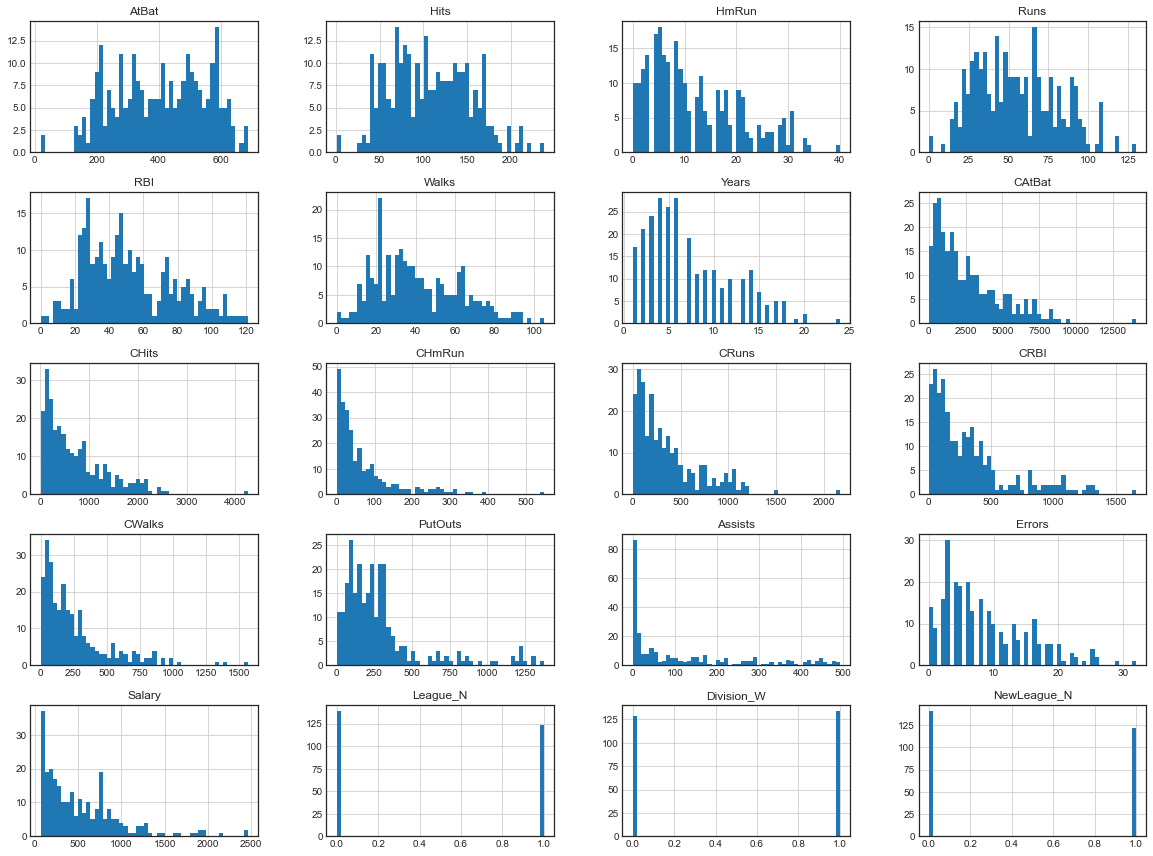

In [12]:
# Quick overview of all numeric variables of the data

df.hist(bins=50, figsize=(20,15))
plt.show()

### Check for correlation among variables
Looks like we do have multicollinearity among variables

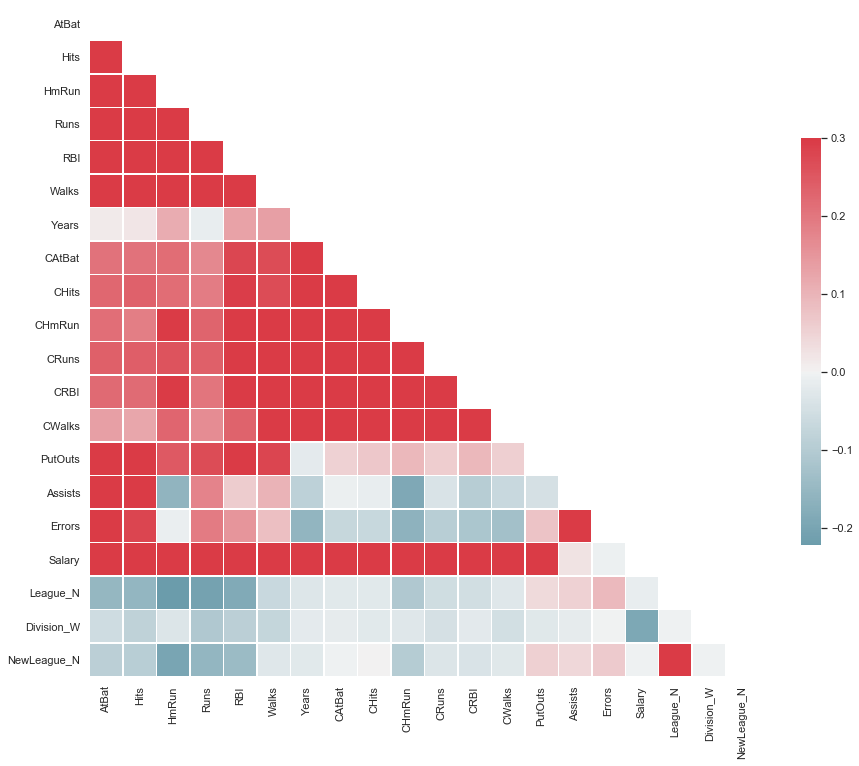

In [25]:
#correlation matrix
sns.set(style="white")

# Compute the correlation matrix
corrmat = df.corr() # corr calculation

# Simplest way: 
# sns.heatmap(corrmat, vmax=.8, square=True);

# Create a white mask for the upper triangle
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corrmat, mask=mask, 
            cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

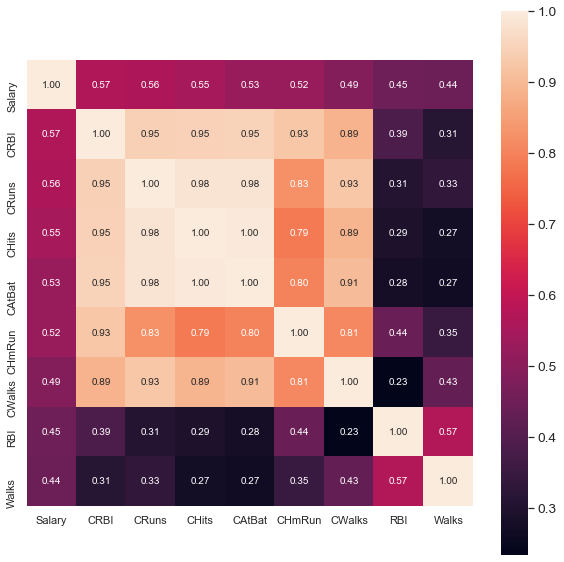

In [27]:
f, ax = plt.subplots(figsize=(10, 10))
k = 9 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Salary')['Salary'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# 2. <a class="anchor" id="2"></a> Standard Linear Regression Models


## 2.1. <a class="anchor" id="2.1"></a> Fit each variable into a single linear regression model

R2 is extremely low. So simple regression model is not an answer here.

R2 of Single Regression with AtBat: 0.17
Coefficient of AtBat: 1.10


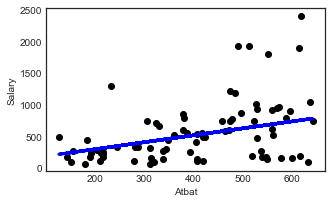

R2 of Single Regression with Hits: 0.20
Coefficient of Hits: 4.04


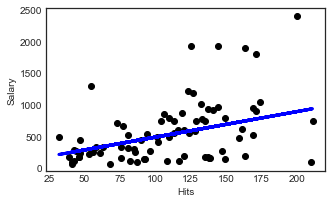

R2 of Single Regression with HmRun: 0.12
Coefficient of HmRun: 16.55


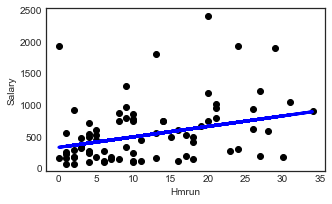

R2 of Single Regression with Runs: 0.20
Coefficient of Runs: 6.55


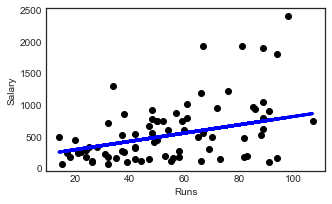

R2 of Single Regression with RBI: 0.26
Coefficient of RBI: 6.91


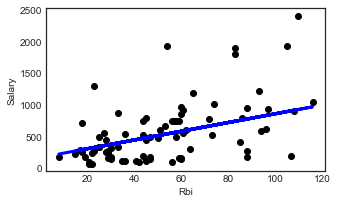

R2 of Single Regression with Walks: 0.26
Coefficient of Walks: 7.81


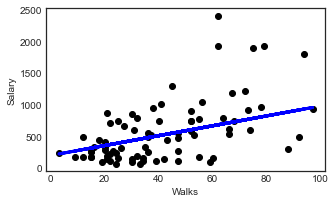

R2 of Single Regression with Years: 0.17
Coefficient of Years: 34.40


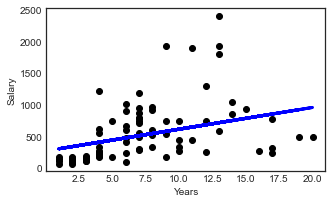

R2 of Single Regression with CAtBat: 0.30
Coefficient of CAtBat: 0.10


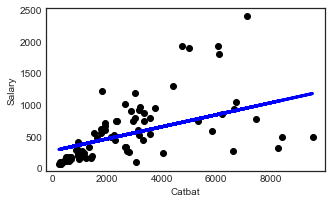

R2 of Single Regression with CHits: 0.32
Coefficient of CHits: 0.35


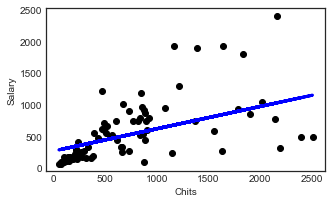

R2 of Single Regression with CHmRun: 0.31
Coefficient of CHmRun: 2.85


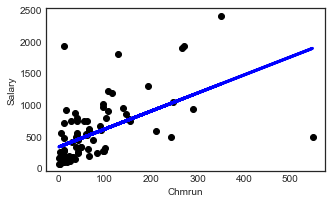

R2 of Single Regression with CRuns: 0.35
Coefficient of CRuns: 0.69


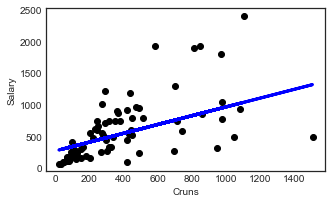

R2 of Single Regression with CRBI: 0.35
Coefficient of CRBI: 0.76


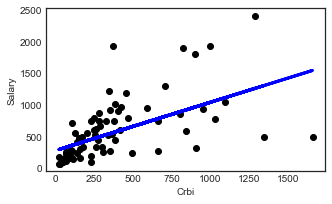

R2 of Single Regression with CWalks: 0.28
Coefficient of CWalks: 0.76


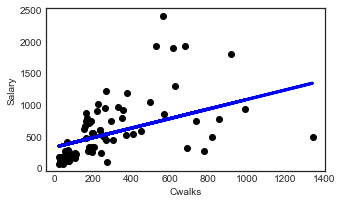

R2 of Single Regression with PutOuts: 0.11
Coefficient of PutOuts: 0.41


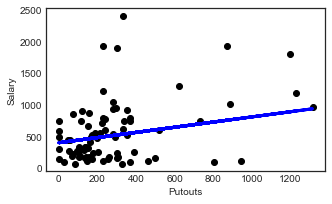

R2 of Single Regression with Assists: -0.02
Coefficient of Assists: 0.18


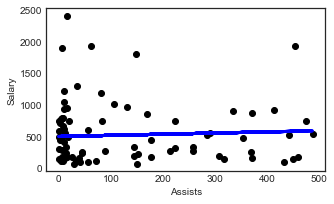

R2 of Single Regression with Errors: -0.01
Coefficient of Errors: 0.06


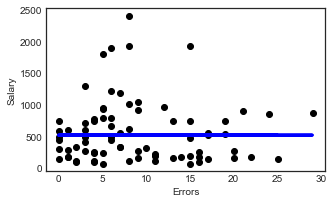

R2 of Single Regression with League_N: -0.08
Coefficient of League_N: -112.32


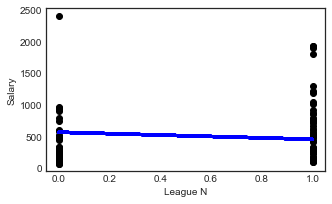

R2 of Single Regression with Division_W: 0.03
Coefficient of Division_W: -161.40


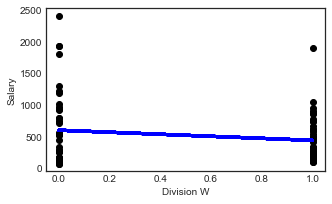

R2 of Single Regression with NewLeague_N: -0.07
Coefficient of NewLeague_N: -98.61


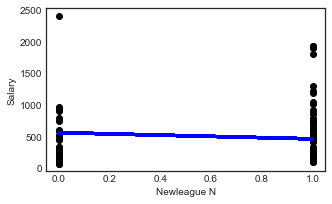

In [7]:
# Create a for loop for all variables

y=df[['Salary']]
X=df.drop(columns = 'Salary')
 
plot_count = 1

for feature in list(X.columns):
    X_feature = X[[feature]]
    X_train, X_test, y_train, y_test = train_test_split(X_feature,y,train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)
# Create linear regression object
    regr = LinearRegression()
# Train the model using the training sets 
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
 # Plot outputs plt.subplot(2,3,plot_count)
    plt.figure(figsize=(5,3))
    plt.scatter(X_test, y_test, color='black') 
    plt.plot(X_test, y_pred, color='blue',
    linewidth=3) 
    plt.xlabel(feature.replace('_',' ').title()) 
    plt.ylabel('Salary')
    print(f'R2 of Single Regression with {feature}: {r2_score(y_test, y_pred):1.2f}')
    print(f'Coefficient of {feature}: {regr.coef_[0,0]:1.2f}')
    plot_count+=1 
    plt.show()

### 2.2. <a class="anchor" id="2.2"></a> Add all variables into a multiple linear regression model
We do have a number of statiscally insignificant variables (p-value > 0.05)

In [8]:
y=df[['Salary']]
X=df.drop(columns = 'Salary')
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Add intercept so that OLS model fits the same as the Skilearn Regressor, 
# and the R2 is improved significantly because the model is more flexible.

X_train = sm.add_constant(X_train)

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train).fit()
# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

/Users/elle.le/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     10.36
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           1.33e-19
Time:                        21:18:53   Log-Likelihood:                -1305.6
No. Observations:                 184   AIC:                             2651.
Df Residuals:                     164   BIC:                             2715.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         269.7278    108.515      2.486      0.014      55.461     483.995
AtBat          -2.5841      0.792     -3.262      0.001      -4.148      -1.020
Hits            9.5276      2.818      3.382      0.001       3.964      15.091
HmRun           5.1621      7.392      0.698      0.486      -9.433      19.757
Runs           -2.1505      3.581     -0.601      0.549      -9.220       4.920
RBI            -3.6371      3.135     -1.160      0.248      -9.827       2.553
Walks           6.9305      2.250      3.080      0.002       2.487      11.374
Years           1.5516     15.128      0.103      0.918     -28.320      31.423
CAtBat         -0.2885      0.173     -1.671      0.097      -0.629       0.052
CHits           0.5806      0.802      0.724      0.470      -1.003       2.164
CHmRun          1.0147      2.128      0.477      0.634      -3.188       5.217
CRuns           1.2832      0.869      1.477      0.142      -0.432       2.998
CRBI            0.6413      0.871      0.737      0.462      -1.078       2.360
CWalks         -0.8570      0.378     -2.268      0.025      -1.603      -0.111
PutOuts         0.2763      0.094      2.950      0.004       0.091       0.461
Assists         0.4367      0.250      1.750      0.082      -0.056       0.929
Errors         -2.8628      4.991     -0.574      0.567     -12.719       6.993
League_N        8.7944     80.283      0.110      0.913    -149.727     167.316
Division_W    -92.6456     48.581     -1.907      0.058    -188.570       3.279
NewLeague_N   -59.5235     79.227     -0.751      0.454    -215.960      96.912
==============================================================================
Omnibus:                       85.995   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              514.763
Skew:                           1.651   Prob(JB):                    1.66e-112
Kurtosis:                      10.499   Cond. No.                     1.87e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
# We can also use skilearn to run the regression.
# It returns the same output. However, the details are not summarized as nicely as the OLS one.

y=df[['Salary']]
X=df.drop(columns = 'Salary')
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)
regressor = LinearRegression()  
#training the algorithm
regressor.fit(X_train, y_train) 

#R2 for test data
y_pred = regressor.predict(X_test)

print(f'R2 score of train set: {regressor.score(X_train,y_train):1.2f}')
print(f'R2 score of test set: {r2_score(y_test, y_pred):1.2f}')

print('Intercept: ',regressor.intercept_)

from sklearn import metrics
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred):1.2f}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, y_pred):1.2f}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred)):1.2f}')

# Coeff
pd.DataFrame(regressor.coef_[0,:], X_train.columns, columns=['Coefficient'])

R2 score of train set: 0.55
R2 score of test set: 0.48
Intercept:  [269.72781952]
Mean Absolute Error: 244.08
Mean Squared Error: 123843.30
Root Mean Squared Error: 351.91


,Coefficient
AtBat,-2.584107
Hits,9.527601
HmRun,5.162126
Runs,-2.150496
RBI,-3.637109
Walks,6.930531
Years,1.551600
CAtBat,-0.288488
CHits,0.580621
CHmRun,1.014707


### Comment
R2 is around 0.5 for both test and train sets, meaning only half of the data is explained by the model. (It is much better than the single regressiom models though)
In addition, the RMSE is 350 while the Salary mean is 500. So the error percentage is above 70%, which is too high.
Conclusion: this model has a lot to improve.

## 2.3. <a class="anchor" id="2.3"></a> Standardize Data

Now we can try if standardization improve model performance. Variables are on different scales. 
Means range from 7 to 2657. They are not too wide, so I doubt if standardization helps.
Let's test it out!
- Yup, models' performance is basically the same.
- What is the difference between Scale and StandardScaler? Mathematically they are the same, just the implementation is different.
- When using Scale, it is important to do it separately on test and train data to avoid data leak (if you do it on the whole data, it will take the mean of that set, instead of the train/test set). More details here: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html
- I wonder if we need to standardize Y. I guess it doesn't matter because Y and Y_scaled will scale the coefficient accordingly. Also, when scale Y, it is more difficult to read the model. Therefore, I prefer not to scale Y.

In [102]:
# Using Scale both X and y

y=df[['Salary']]
X=df.drop(columns = 'Salary')
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)
regressor = LinearRegression()  
#training the algorithm
regressor.fit(scale(X_train), scale(y_train)) 

#R2 for test data
y_pred = regressor.predict(scale(X_test))

print(f'R2 score of train set: {regressor.score(scale(X_train),scale(y_train)):1.2f}')
print(f'R2 score of test set: {r2_score(scale(y_test), y_pred):1.2f}')

print('Intercept: ',regressor.intercept_)

from sklearn import metrics
print(f'Mean Absolute Error: {metrics.mean_absolute_error(scale(y_test), y_pred):1.2f}')
print(f'Mean Squared Error: {metrics.mean_squared_error(scale(y_test), y_pred):1.2f}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(scale(y_test), y_pred)):1.2f}')

# Coeff
pd.DataFrame(regressor.coef_[0,:], X_train.columns, columns=['Coefficient'])

R2 score of train set: 0.55
R2 score of test set: 0.48
Intercept:  [-2.82013032e-16]
Mean Absolute Error: 0.50
Mean Squared Error: 0.52
Root Mean Squared Error: 0.72


,Coefficient
AtBat,-0.883259
Hits,1.002977
HmRun,0.103287
Runs,-0.130069
RBI,-0.213303
Walks,0.343518
Years,0.017439
CAtBat,-1.537433
CHits,0.878917
CHmRun,0.179875


In [77]:
# Using Scale X only

y=df[['Salary']]
X=df.drop(columns = 'Salary')
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)
regressor = LinearRegression()  
#training the algorithm
regressor.fit(scale(X_train), y_train) 

#R2 for test data
y_pred = regressor.predict(scale(X_test))

print(f'R2 score of train set: {regressor.score(scale(X_train),y_train):1.2f}')
print(f'R2 score of test set: {r2_score(y_test, y_pred):1.2f}')

print('Intercept: ',regressor.intercept_)

from sklearn import metrics
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred):1.2f}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, y_pred):1.2f}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred)):1.2f}')

# Coeff
pd.DataFrame(regressor.coef_[0,:], X_train.columns, columns=['Coefficient'])

R2 score of train set: 0.55
R2 score of test set: 0.48
Intercept:  [521.60925543]
Mean Absolute Error: 244.53
Mean Squared Error: 122005.48
Root Mean Squared Error: 349.29


,Coefficient
AtBat,-382.468751
Hits,434.309015
HmRun,44.725140
Runs,-56.322567
RBI,-92.364349
Walks,148.750120
Years,7.551608
CAtBat,-665.739245
CHits,380.588834
CHmRun,77.889493


In [62]:
# Using StandardScaler

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

y=df[['Salary']]
X=df.drop(columns = 'Salary')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Using standard scaler to standardize the data
pipe = make_pipeline(StandardScaler(), LinearRegression())
# apply scaling on training data
pipe.fit(X_train, y_train)  

print(f'R2 of test data: {pipe.score(X_test, y_test):1.2f}')

pd.DataFrame(pipe.named_steps['linearregression'].coef_[0,:],X_train.columns, columns=['Coefficient'])

R2 of test data: 0.41


,Coefficient
AtBat,-252.645370
Hits,379.226590
HmRun,64.671378
Runs,-82.334309
RBI,-52.674554
Walks,113.427805
Years,35.907413
CAtBat,-318.631805
CHits,-136.216934
CHmRun,-50.889286


## 3. Ridge Regression <a class="anchor" id="3"></a>

The function to optimize:
### $$ ||X\beta - y||^2_2 + \alpha ||\beta||^2_2 $$


In [10]:
y=df['Salary'] #y needs to have 1 column only
X=df.drop(columns = 'Salary')

In [68]:
X.shape

(263, 19)

In [72]:
y.shape

(263,)

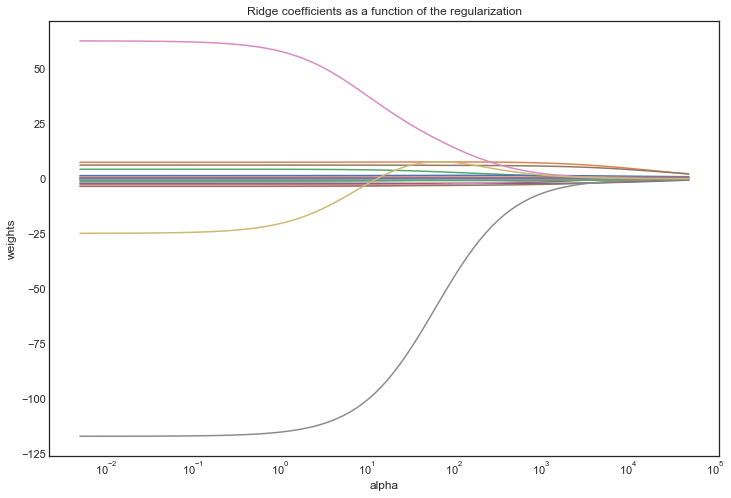

In [73]:
alphas = 10**np.linspace(5,-2,100)*0.5

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X,y)
    coefs.append(ridge.coef_)

plt.figure(figsize = (12,8))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization');

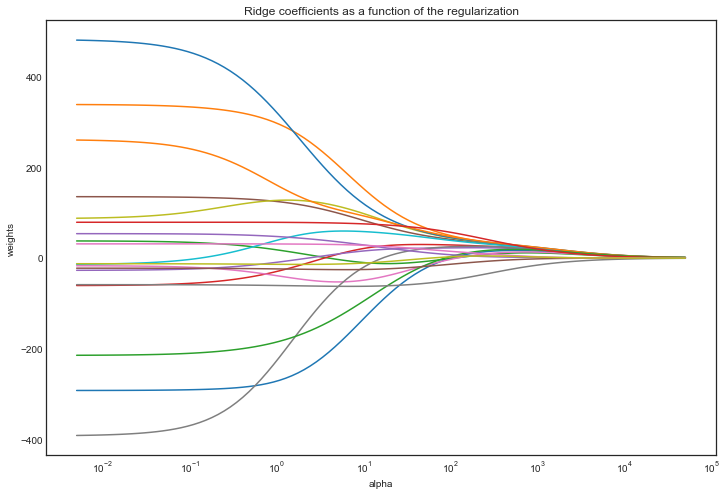

In [16]:
alphas = 10**np.linspace(5,-2,100)*0.5

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X),y)
    coefs.append(ridge.coef_)

plt.figure(figsize = (12,8))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization');

In [8]:
# Load the data
y=df['Salary'] 
X=df.drop(columns = 'Salary')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [40]:
# Ridge - find alpha using cross validation - scaled X

from sklearn.model_selection import RepeatedKFold

# Define the model
model = Ridge()
# Define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 400, 5)
# define search
search = GridSearchCV(model, grid, scoring='r2', cv=cv, n_jobs=-1)

# NOTE: we can select scoring criteria from here: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

# perform the search
results = search.fit(scale(X_train), y_train)
# summarize
print('MSE: %.3f' % -results.best_score_)
print('Config: %s' % results.best_params_)

MSE: -0.378
Config: {'alpha': 275}


In [33]:
# Ridge - find alpha using cross validation - no scale

from sklearn.model_selection import RepeatedKFold

# Define the model
model = Ridge()
# Define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 300, 10)
# define search
search = GridSearchCV(model, grid, scoring='r2', cv=cv, n_jobs=-1)

# NOTE: we can select scoring criteria from here: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

# perform the search
results = search.fit(X_train, y_train)
# summarize
print('R2: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

R2: 0.253
Config: {'alpha': 20}


In [100]:
# Another way using CV
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit(scale(X_train), y_train)
ridgecv.alpha_

142.4017934217901

In [101]:
ridge2.set_params(alpha=ridgecv.alpha_)
ridge2.fit(scale(X_train), y_train)
mean_squared_error(y_test, ridge2.predict(scale(X_test)))

149333.48600166134

In [37]:
ridge2=Ridge()
ridge2.set_params(alpha=20)
ridge2.fit(scale(X_train), y_train)
mean_squared_error(y_test, ridge2.predict(scale(X_test)))

144463.53211083045

In [39]:
ridge2.score(scale(X_train),y_train)

0.5427868704340335

In [12]:

ridge2 = Ridge(alpha=705)
ridge2.fit(X_train, y_train)
pred = ridge2.predict(X_test)
mean_squared_error(y_test, pred)

128628.87355490384

In [13]:
ridge2.coef_

array([-1.88687636,  8.4385098 ,  3.32922887, -2.42691648, -0.61182038,
        5.00641746,  2.29788825, -0.11472693, -0.32199588, -0.98040135,
        1.80880382,  0.87432376, -0.58911726,  0.27431553,  0.25819908,
       -0.47506163,  4.05434919, -6.08220614,  2.58779296])

In [14]:
ridge2.intercept_

4.283144469737067

In [106]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
ridge2 = Ridge(alpha=119)
ridge2.fit(scaler.transform(X_train), y_train)
pred = ridge2.predict(scaler.transform(X_test))
mean_squared_error(y_test, pred)

117607.39215492373

In [104]:
ridge2.coef_

array([[ 13.41610266,  19.88996282,  10.07955166,  16.74434072,
         14.38516585,  17.36545885,  11.81980333,  19.16287747,
         21.8969651 ,  20.05404291,  21.92001281,  22.49399817,
         15.75268692,  16.33603598,   2.79406974,  -2.00218554,
         -3.5205062 , -13.29985507,  -4.11416708]])

In [105]:
ridge2.intercept_

array([521.60925543])

In [91]:
ridge2.score(X_train,y_train)

-7326.43272469148

(0, 400)

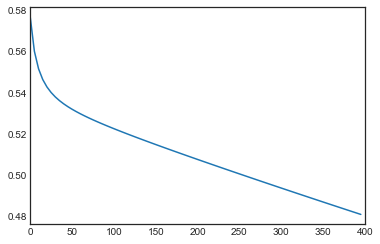

In [29]:
# Load the data
y=df['Salary'] 
X=df.drop(columns = 'Salary')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ridge.score(scale(X_train),y_train)
alphas=np.arange(0,400,5)
score = []
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(scale(X_train),y_train)
    score.append(ridge.score(scale(X_train),y_train))
    
plt.plot(alphas,score)
ax=plt.gca()
ax.set_xlim([0,400])